In [ ]:
print("Hare Krishna")

Hare Krishna!


# Ethereum Price Prediction using Random Forest Regression

In [40]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from math import sqrt

# Importing Dataset:
Kaggle dataset is used having historical data from 2015 to 2021
    

In [41]:
df = pd.read_csv('Ethereum_dataset.csv')
df = df.dropna()
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,08-08-2015 23:59,2.798810,0.714725,2.793760,0.753325,674188,4.548689e+07
1,2,Ethereum,ETH,09-08-2015 23:59,0.879810,0.629191,0.706136,0.701897,532170,4.239957e+07
2,3,Ethereum,ETH,10-08-2015 23:59,0.729854,0.636546,0.713989,0.708448,405283,4.281836e+07
3,4,Ethereum,ETH,11-08-2015 23:59,1.131410,0.663235,0.708087,1.067860,1463100,6.456929e+07
4,5,Ethereum,ETH,12-08-2015 23:59,1.289940,0.883608,1.058750,1.217440,2150620,7.364501e+07
...,...,...,...,...,...,...,...,...,...,...
2155,2156,Ethereum,ETH,02-07-2021 23:59,2155.596496,2021.824808,2109.892677,2150.040364,31796212554,2.505530e+11
2156,2157,Ethereum,ETH,03-07-2021 23:59,2237.567155,2117.590013,2150.835025,2226.114282,17433361641,2.594480e+11
2157,2158,Ethereum,ETH,04-07-2021 23:59,2384.286857,2190.837703,2226.550382,2321.724112,18787107473,2.706220e+11
2158,2159,Ethereum,ETH,05-07-2021 23:59,2321.922836,2163.041394,2321.922836,2198.582464,20103794829,2.562980e+11


In [42]:
df.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [43]:
df['Name'] = df['Name'].replace(['Ethereum'], '1')
df = df.drop('Symbol',axis=1)
df.head()

,SNo,Name,Date,High,Low,Open,Close,Volume,Marketcap
0,1,1,08-08-2015 23:59,2.798810,0.714725,2.793760,0.753325,674188,45486894.24
1,2,1,09-08-2015 23:59,0.879810,0.629191,0.706136,0.701897,532170,42399573.50
2,3,1,10-08-2015 23:59,0.729854,0.636546,0.713989,0.708448,405283,42818364.39
3,4,1,11-08-2015 23:59,1.131410,0.663235,0.708087,1.067860,1463100,64569288.43
4,5,1,12-08-2015 23:59,1.289940,0.883608,1.058750,1.217440,2150620,73645010.99


In [44]:
df['date_parsed'] = pd.to_datetime(df['Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Extract date information
df['year'] = df['date_parsed'].dt.year
df['month'] = df['date_parsed'].dt.month
df['day'] = df['date_parsed'].dt.day

# Use get_dummies to create dummy variables
dummy = pd.get_dummies(df, columns=['year', 'month', 'day'])

df = df.dropna()

# Print the DataFrame to see the updated columns
df.head()

,SNo,Name,Date,High,Low,Open,Close,Volume,Marketcap,date_parsed,year,month,day
0,1,1,08-08-2015 23:59,2.798810,0.714725,2.793760,0.753325,674188,45486894.24,2015-08-08 23:59:00,2015,8,8
1,2,1,09-08-2015 23:59,0.879810,0.629191,0.706136,0.701897,532170,42399573.50,2015-08-09 23:59:00,2015,8,9
2,3,1,10-08-2015 23:59,0.729854,0.636546,0.713989,0.708448,405283,42818364.39,2015-08-10 23:59:00,2015,8,10
3,4,1,11-08-2015 23:59,1.131410,0.663235,0.708087,1.067860,1463100,64569288.43,2015-08-11 23:59:00,2015,8,11
4,5,1,12-08-2015 23:59,1.289940,0.883608,1.058750,1.217440,2150620,73645010.99,2015-08-12 23:59:00,2015,8,12


In [45]:
df = df.drop('SNo',axis=1)
df = df.drop('Name',axis=1)
df = df.drop('Date',axis=1)
df = df.drop('date_parsed',axis=1)

df.head()

,High,Low,Open,Close,Volume,Marketcap,year,month,day
0,2.798810,0.714725,2.793760,0.753325,674188,45486894.24,2015,8,8
1,0.879810,0.629191,0.706136,0.701897,532170,42399573.50,2015,8,9
2,0.729854,0.636546,0.713989,0.708448,405283,42818364.39,2015,8,10
3,1.131410,0.663235,0.708087,1.067860,1463100,64569288.43,2015,8,11
4,1.289940,0.883608,1.058750,1.217440,2150620,73645010.99,2015,8,12


#### Exploratory Data Analysis:

C:\Users\Gundeep\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


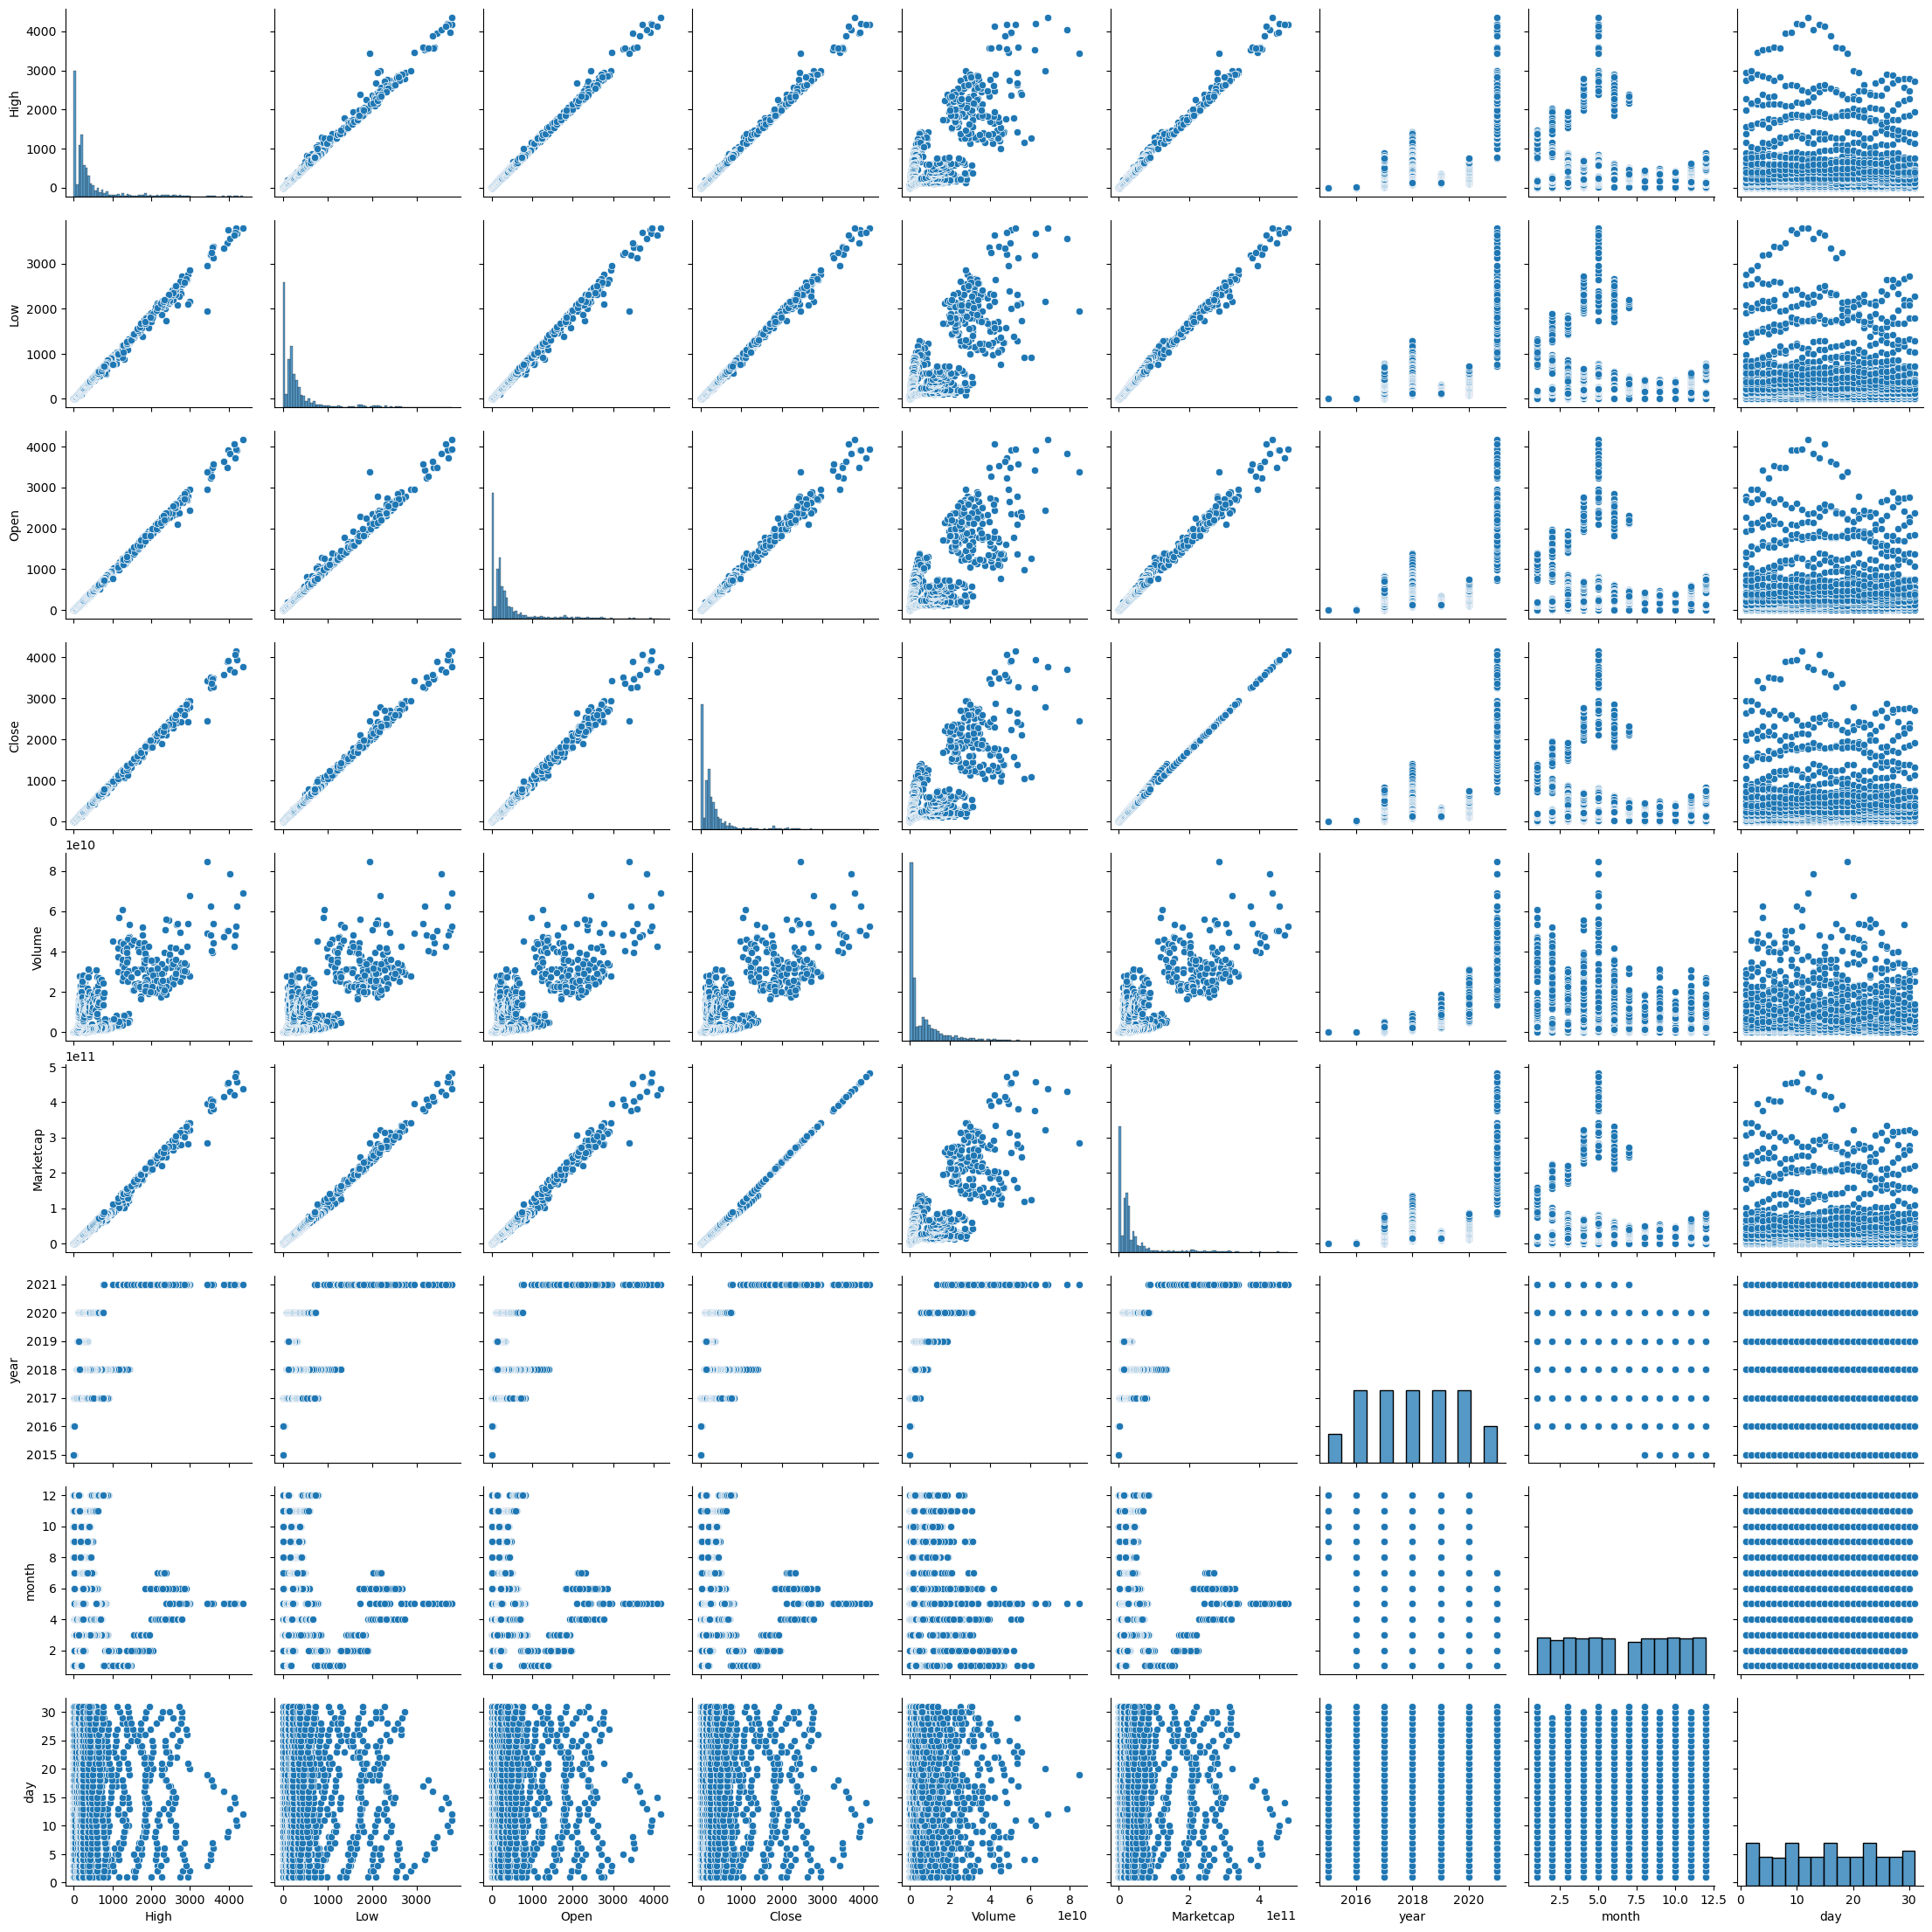

In [78]:
import seaborn as sns
sns.pairplot(df)

In [111]:
# Select relevant columns for correlation analysis
selected_columns = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap', 'year', 'month', 'day']

# Calculate correlation coefficients
correlation_matrix = df[selected_columns].corr()

# Extract correlations with the 'Close' column
correlation_with_close = correlation_matrix['Close']

# Print the correlation coefficients
print(correlation_with_close)

High         0.998457
Low          0.998552
Open         0.996722
Close        1.000000
Volume       0.769200
Marketcap    0.998351
year         0.579745
month       -0.203693
day         -0.020720
Name: Close, dtype: float64


<Axes: >

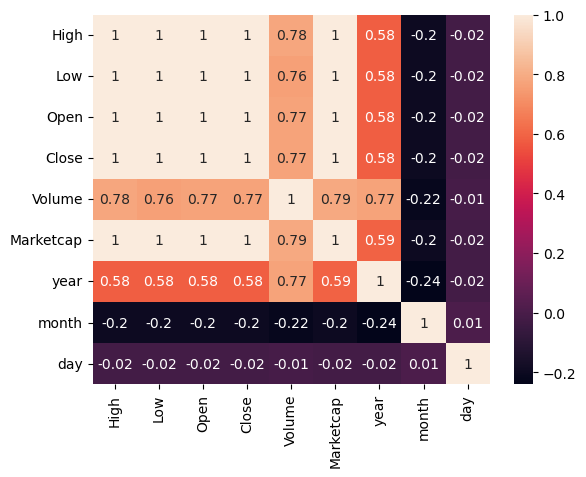

In [112]:
## plotting correlations using heatmap
import seaborn as sns
correlation_matrix=df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)

## Preparing dataset for Model training with 80-20 test-train split

In [105]:
X=df[['High','Low','Open','Volume','Marketcap','year']]
y=df['Close']

In [108]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## using random forest regression
h=RandomForestRegressor(n_estimators=100,random_state=1)

# Performace Metrices of model

In [119]:
h.fit(x_train,y_train)
y_pred=h.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("Mean squared Error:",mse)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

rmse = sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print("R2 score (testing data) is:",r_squared)


Mean squared Error: 108.7459372530492
Mean Absolute Error: 4.770722244764
Root Mean Squared Error: 10.428132011681154
R2 score (testing data) is: 0.9995837644691359


### Good R2 Score: 0.9995836

In [131]:
def calculatemape(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Mean Absolue Percentage Error (MAPE): {calculatemape(y_test,y_pred)} %")

Mean Absolue Percentage Error (MAPE): 1.6221620494079554 %


### Some other performace metrices:

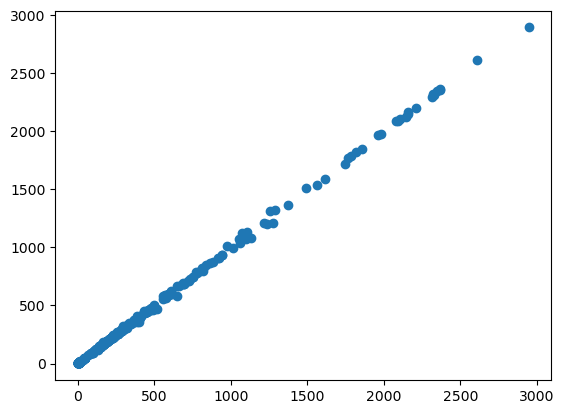

In [122]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

## 5-9-24

C:\Users\Gundeep\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


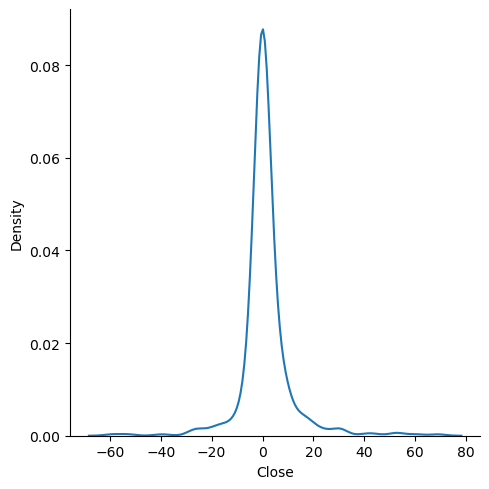

In [130]:
residuals = y_test-y_pred
residuals

#plotting residuals
sns.displot(residuals, kind="kde")

## 5-9-24

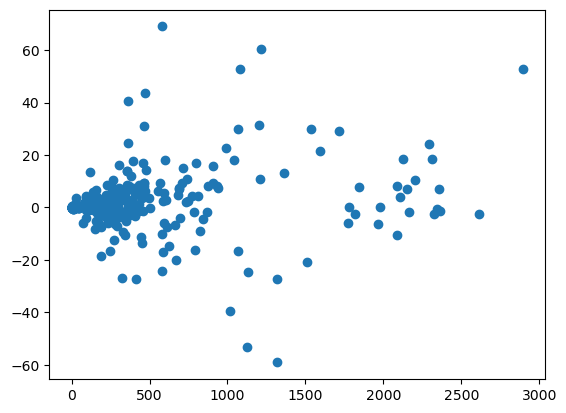

In [127]:
## scatter wrt predictions and residuals   
## 5-9-24

plt.scatter(y_pred, residuals)
## we see uniform distribution of residuals and predictions: "indicates model 
## is performing well"

#### The above uniform-distrubution indicates that the model is performing well.

## Model-Score : 0.9996

In [134]:
print("Score of Model is : ",h.score(x_test,y_test))

scr = h.score(x_test,y_test)
print("Score % of Model is : ",scr*100)

Score of Model is :  0.9995837644691359
Score % of Model is :  99.95837644691359


In [113]:
def calculate_accuracy(y_true, y_pred, tolerance_percent=5):
    """
    Calculate accuracy based on a tolerance percentage.

    Parameters:
    - y_true: Actual values.
    - y_pred: Predicted values.
    - tolerance_percent: Percentage within which predictions are considered accurate.

    Returns:
    - Accuracy as a percentage.
    """
    # Calculate the absolute percentage error for each prediction
    absolute_percentage_error = np.abs((y_test - y_pred) / y_true) * 100

    # Count the number of predictions within the specified tolerance
    accurate_predictions = np.sum(absolute_percentage_error <= tolerance_percent)

    # Calculate accuracy as the percentage of accurate predictions
    accuracy = (accurate_predictions / len(y_test)) * 100

    return accuracy

# Example usage:
# Assuming y_true and y_pred are your actual and predicted values
accuracy = calculate_accuracy(y_test, y_pred, tolerance_percent=5)
print(f"Accuracy: {accuracy}%")

Accuracy: 94.44444444444444%


In [147]:
df.head(5)

,High,Low,Open,Close,Volume,Marketcap,year,month,day
0,2.798810,0.714725,2.793760,0.753325,674188,45486894.24,2015,8,8
1,0.879810,0.629191,0.706136,0.701897,532170,42399573.50,2015,8,9
2,0.729854,0.636546,0.713989,0.708448,405283,42818364.39,2015,8,10
3,1.131410,0.663235,0.708087,1.067860,1463100,64569288.43,2015,8,11
4,1.289940,0.883608,1.058750,1.217440,2150620,73645010.99,2015,8,12


# Prediction of New Data using developed Model:

In [148]:
new_data = ['2488.92','2313.27','2420.19','16709600747','294644654909','2024']

#### transformation of new_data

In [152]:
import numpy as np

# Convert the values to numerical data types
new_data = [float(value) for value in new_data]

# Reshape the list into a 2D array
new_data_array = np.array(new_data).reshape(1, -1)

In [153]:
# prediction
predictions = h.predict(new_data_array)

# Display the predictions
print("Closing price of ethereum on Sep 4th,2024 is predicted to be",predictions,"$.")


Closing price of ethereum on Sep 4th,2024 is predicted to be [2526.72850694] $.


C:\Users\Gundeep\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [155]:
print("ERRORS IN PREDICTED VALUE ON SEP 4, 2024:","\n")

new_date = [2448.98]
new_date = [float(value) for value in new_date]

# Reshape the list into a 2D array
new_data_array = np.array(new_date).reshape(1, -1)

pred = [2526.72850694]
pred = [float(value) for value in pred]

# Reshape the list into a 2D array
pred = np.array(pred).reshape(1, -1)


mse = mean_squared_error(new_date,pred)
print("Mean squared Error:",mse)

mae = mean_absolute_error(new_date,pred)
print(f'Mean Absolute Error: {mae}')

rmse = sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

def calculatemape(new_date, pred):
    return np.mean(np.abs((new_date - pred) / new_date)) * 100

print(f"Mean Absolue Percentage Error (MAPE): {calculatemape(new_date,pred)} %")


ERRORS IN PREDICTED VALUE ON SEP 4, 2024: 

Mean squared Error: 6044.830331399224
Mean Absolute Error: 77.74850693999997
Root Mean Squared Error: 77.74850693999997
Mean Absolue Percentage Error (MAPE): 3.1747301709283033 %


# Pickling The Model File for deployment

In [159]:
import pickle

pickle.dump(h, open('RanF_reg.pkl', 'wb'))

In [160]:
#loading

pickled_model = pickle.load(open('RanF_reg.pkl', 'rb'))

In [164]:
pickled_model.predict(np.array(new_data).reshape(1, -1))

C:\Users\Gundeep\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2526.72850694])